Jorge Ortiz. Inteligencia Artificial. GitHub: https://github.com/jorgeortizc05/ia2

## Boletín de prácticas 1 - GradientDescent-1
### Objetivos:
* Familiarizarse con los principales aspectos y etapas del método de descenso por gradiente.
* Conocer y aplicar el método de descenso por gradiente para minimizar funciones sencillas.
* Conocer cómo aplicar el proceso de descenso por gradiente de forma automatizada con soporte de **sympy** y **Jupyter Notebook*.

### Enunciado:

1. Seleccionar una función matemática para realizar el proceso de minimización. Ejecutar al menos **3 pasos** del método de descenso por gradiente. 
2. Diseñar y desarrollar un cuaderno en Jupyter Notebook donde se realicen todos los pasos correspondientes al proceso de minimización de la función a través del método de descenso por gradiente.
3. El cuaderno deberá incluir los siguientes puntos:
    1. Gráfica de la función y los puntos que se obtienen a medida que se ejecutan los pasos de cálculo (hasta $k=3$).
    2. Aplicación de las funciones de derivación y evaluación de forma similar a la que se ha detallado en el presente cuaderno.
    3. Incluir un acápite sobre las funciones cóncavas y los puntos estacionarios (incluir gráficos).
    4. Emplear las funcionalidades que proveen los paquetes **matplotlib** y **sympy**.
  
  
### Criterios de evaluación:
Los criterios o rúbrica de evaluación del Boletín de Prácticas 1 son los siguientes:
1. Adecuada complejidad de la función seleccionada para el proceso de minimización (procurar no usar funciones cóncavas).
2. Correcta explicación y detalle de cada paso ejecutado con el método de descenso por gradiente.
3. Verificación de la solución encontrada.
4. Elementos extra: incluye recta (flecha) con la dirección del gradiente, animaciones, etc.

### Prerrequisitos:
A fin de poder realizar esta práctica, deberá contar con los siguientes prerrequisitos:
1. Haber leído de forma completa el presente cuaderno.
2. Tener instalados los siguientes paquetes en su computador:
    1. Python 2.7+ (de preferencia 3.6+)
    2. [Sympy](http://www.sympy.org)
    3. [matplotlib](https://matplotlib.org/)


### Detalles de la entrega:
El cuaderno de Jupyter Notebook deberá ser cargado en el AVAC con todos los recursos necesarios (imágenes, enlaces, etc.) en un archivo comprimido, dentro de la tarea **Boletín de Prácticas 1: Descenso por gradiente f(x)**. Los detalles de la fecha y hora de entrega se encuentran especificados en el AVAC.


### Algunos enlaces de utilidad:
A continuación se presentan algunos enlaces que pueden resultar de utilidad:
* Wiki con algunas funciones básicas de la librería [sympy](https://github.com/sympy/sympy/wiki/Quick-examples)
* Un tutorial interactivo con ejemplos de técnicas de [optimización](http://www.benfrederickson.com/numerical-optimization/).

## Ejercicio a realizar

Funcion a minimizar

$\frac{1}{5.3}x^{3}-3x+x^{2}-2.37$

El valor de punto de partida será $x^{(0)}=5.3$

Graficamos la función que se minimizará y el punto de partida:

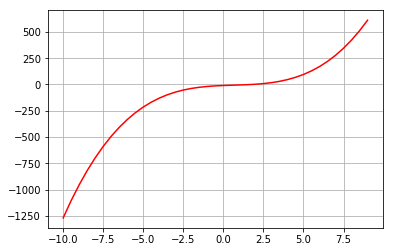

In [69]:
import matplotlib.pyplot as pp
import numpy as np


def fx(x):
    return np.power(x,3)-2*np.power(x,2)+6*x-10

x=np.arange(-10,9.5,0.5)
y=fx(x)

pp.plot(x,y,c='red')
pp.grid(True)
pp.show()
a = 23

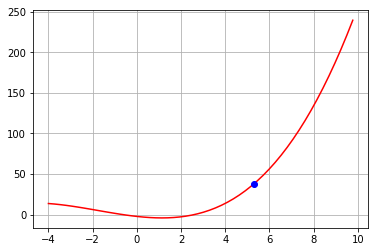

In [70]:
def fx2(x2):
    return (1/5.3)*np.power(x2,3)-3*x2+np.power(x2,2)-2.37

x2=np.arange(-4,10,0.27)
y2=fx2(x2)
pp.plot(x2,y2,'r')
pp.plot(5.3,fx2(5.3),'bo')
pp.grid(True)
pp.show()

#### Resolución:

* Calculamos la derivada de la función y evaluamos su valor en el punto $x^{(0)}$:

In [71]:
from sympy import Symbol, Function, diff, solve

x=Symbol('x')
f=Function('f')(x)
x0=5.3

fx=(1/5.3)*x**3-3*x+x**2-2.37

r=diff(fx)
print("Derivada de la funcion: ",r)
print("Valor en x^(0):",r.subs(x,x0).evalf())

Derivada de la funcion:  0.566037735849057*x**2 + 2*x - 3
Valor en x^(0): 23.5000000000000


Lo que nos da como resultado lo siguiente:

$f^{'}(x) = 0.57x^{2}+2x-3$

$\nabla f(x^{(0)}) = 23.50$

* A fin de de encontrar el valor de $t^{*}_{0}$ requerido para calcular el siguiente punto $x^{(1)}$, calculamos el valor de la siguiente función:

 <div style="text-align:center">
     $\theta(t) = f(x^{(0)})-t \nabla f(x^{(0)})$.
 </div> 
 
 <div style="text-align:center">
    <br />$\theta^{'}(t)=-\nabla f\left( x^{(0)} - t \nabla f(x^{(0)} \right) \nabla f(x^{(0)})$
    <br />$=-\nabla f\left( \mathbf(5.3)-t \nabla f(x^{0}) \right) \nabla f(x^{(0)})$
    <br />$=-\nabla f\left( \mathbf(5.3)-23.50\cdot t \right) 23.50$
 </div> 
 \_       
   En este punto, sustituimos $(5.3-23.50\cdot t)$ por $x$ en la función a minimizar que derivamos previamente $f^{'}(x) = 0.57x^{2}+2x-3$:
   
<div style="text-align:center">
    <br />$=-\left( 0.57\cdot(5.3-23.5t)^{2}+2 \cdot (5.3-23.5t)-3 \right)\cdot 23.50$
</div>

   Aplicamos factoreo a la ecuación y calculamos las raíces:

In [72]:
# Ingresamos la funcion en sympy y buscamos las raices:
fp=-((0.57*(5.3-23.5*x)**2+2*(5.3-23.5*x)-3))
print(fp.expand())

print("Raices de la ecuacion:" ,solve(fp))

-314.7825*x**2 + 188.987*x - 23.6113
Raices de la ecuacion: [0.177289454026470, 0.423083819583086]


No realizamos la multiplicación por $23.5$ ya que luego se igualará a $0$, con ello tenemos lo siguiente:
   
<div style="text-align:center">
    <br />$=-\left( -314.78x^{2}+188.99x-23.6113 \right)\cdot 23.5$
</div>

   Y las raíces de la ecuación representarán 2 posibles valores para $t^{*}_{0}$:

<div style="text-align:center">
    <br />$\left[ 0.18, 0.42 \right]$
</div>

   Con ello, calculamos los dos posibles puntos $x^{(1)}$ y determinamos con cuál de los 2 se minimiza de mejor forma la función:

<div style="text-align:center">   
   $
       \begin{split}
           x^{(1)}=\begin{cases}
               5.3-0.177\cdot 23.50~ = & \mathbf{1.14}\\
               5.3-0.423\cdot 23.50~ = & \mathbf{-4.64}
           \end{cases}
       \end{split}
   $
</div>

   De igual forma, evaluamos la función original con los dos nuevos puntos $x^{(1)}$ y en base a ello determinamos cuál es el que minimiza de mejor manera su valor:

In [73]:
v1=fx.subs(x,1.14).evalf()
v2=fx.subs(x,-4.64).evalf()

print("Valores con de la funcion: [%d, %d]" % (v1,v2))

Valores con de la funcion: [-4, 14]


<div style="text-align:center">   
   $
       \begin{split}
           f{(x)}=\begin{cases}
               f(1.14)~ = & \mathbf{-4}\\
               f(-4.6405)~ = & \mathbf{14}
           \end{cases}
       \end{split}
   $
</div>
   Con ello, determinamos que la mejor alternativa es la de la segunda raíz para calcular el punto $x^{(1)}=1.14$ y hacemos $k \leftarrow k+1$ . 

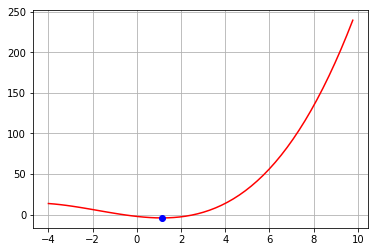

In [74]:
pp.plot(x2,y2,'r')
pp.plot(1.14,fx2(1.14),'bo')
pp.grid(True)
pp.show()

In [66]:
x1 = 1.14
print("Derivada de la funcion: ",r)
print("Valor en x^(1):",r.subs(x,x1).evalf())

Derivada de la funcion:  0.566037735849057*x**2 + 2*x - 3
Valor en x^(1): 0.566037735849057*x**2 + 2.0*x - 3.0


#### Segunda Interaccion
$\nabla f(x^{(1)}) = 0.016$

 <div style="text-align:center">
     $\theta(t) = f(x^{(1)})-t \nabla f(x^{(1)})$.
 </div> 
 
 <div style="text-align:center">
    <br />$\theta^{'}(t)=-\nabla f\left( x^{(1)} - t \nabla f(x^{(1)} \right) \nabla f(x^{(1)})$
    <br />$=-\nabla f\left( \mathbf(1.14)-t \nabla f(x^{1}) \right) \nabla f(x^{(1)})$
    <br />$=-\nabla f\left( \mathbf(1.14)-0.016\cdot t \right) 0.016$
 </div> 
 \_       
   En este punto, sustituimos $(1.14-0.016\cdot t)$ por $x$ en la función a minimizar que derivamos previamente $f^{'}(x) = 0.57x^{2}+2x-3$:
   
<div style="text-align:center">
    <br />$=-\left( 0.57\cdot(1.14-0.016t)^{2}+2 \cdot (1.14-0.016t)-3 \right)\cdot 0.016$
</div>

   Aplicamos factoreo a la ecuación y calculamos las raíces:

In [75]:
# Ingresamos la funcion en sympy y buscamos las raices:
fp=-((0.57*(1.14-0.016*x)**2+2*(1.14-0.016*x)-3))
print(fp.expand())

print("Raices de la ecuacion:" ,solve(fp))

-0.00014592*x**2 + 0.0527936*x - 0.0207719999999997
Raices de la ecuacion: [0.393885601377983, 361.404360012657]


No realizamos la multiplicación por $0.016$ ya que luego se igualará a $0$, con ello tenemos lo siguiente:
   
<div style="text-align:center">
    <br />$=-\left( -0.00014x^{2}+0.052x-0.020 \right)\cdot 0.016$
</div>

   Y las raíces de la ecuación representarán 2 posibles valores para $t^{*}_{1}$:

<div style="text-align:center">
    <br />$\left[ 0.393, 361.40 \right]$
</div>

   Con ello, calculamos los dos posibles puntos $x^{(1)}$ y determinamos con cuál de los 2 se minimiza de mejor forma la función:

<div style="text-align:center">   
   $
       \begin{split}
           x^{(1)}=\begin{cases}
               1.14-0.393\cdot 0.016~ = & \mathbf{1.133}\\
               5.3-361.40\cdot 0.016~ = & \mathbf{-4.6424}
           \end{cases}
       \end{split}
   $
</div>

   De igual forma, evaluamos la función original con los dos nuevos puntos $x^{(1)}$ y en base a ello determinamos cuál es el que minimiza de mejor manera su valor:

In [57]:
v1=fx.subs(x,1.133).evalf()
v2=fx.subs(x,-4.6424).evalf()

print("Valores con de la funcion: [%d, %d]" % (v1,v2))

Valores con de la funcion: [-4, 14]


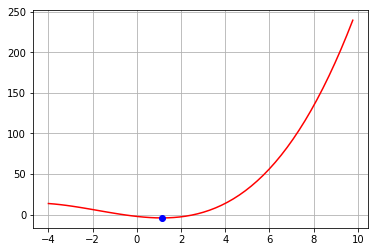

In [58]:
pp.plot(x2,y2,'r')
pp.plot(1.133,fx2(1.133),'bo')
pp.grid(True)
pp.show()

In [59]:
x2 = 1.133
print("Derivada de la funcion: ",r)
print("Valor en x^(1):",r.subs(x,x2).evalf())

Derivada de la funcion:  0.566037735849057*x**2 + 2*x - 3
Valor en x^(1): -0.00738358490566016


#### Tercera Interaccion
$\nabla f(x^{(2)}) = 0.0074$

 <div style="text-align:center">
     $\theta(t) = f(x^{(2)})-t \nabla f(x^{(2)})$.
 </div> 
 
 <div style="text-align:center">
    <br />$\theta^{'}(t)=-\nabla f\left( x^{(2)} - t \nabla f(x^{(2)} \right) \nabla f(x^{(2)})$
    <br />$=-\nabla f\left( \mathbf(1.133)-t \nabla f(x^{1}) \right) \nabla f(x^{(1)})$
    <br />$=-\nabla f\left( \mathbf(1.133)-0.0074\cdot t \right) 0.016$
 </div> 
 \_       
   En este punto, sustituimos $(1.133-0.0074\cdot t)$ por $x$ en la función a minimizar que derivamos previamente $f^{'}(x) = 0.57x^{2}+2x-3$:
   
<div style="text-align:center">
    <br />$=-\left( 0.57\cdot(1.133-0.0074t)^{2}+2 \cdot (1.133-0.0074t)-3 \right)\cdot 0.0074$
</div>

   Aplicamos factoreo a la ecuación y calculamos las raíces:

In [60]:
# Ingresamos la funcion en sympy y buscamos las raices:
fp=-((0.57*(1.133-0.0074*x)**2+2*(1.133-0.0074*x)-3))
print(fp.expand())

print("Raices de la ecuacion:" ,solve(fp))

-3.12132e-5*x**2 + 0.024357988*x + 0.00229727000000002
Raices de la ecuacion: [-0.0943014024259826, 780.468886513853]


No realizamos la multiplicación por $0.0074$ ya que luego se igualará a $0$, con ello tenemos lo siguiente:
   
<div style="text-align:center">
    <br />$=-\left( -0.000003121x^{2}+0.02435x-0.0022 \right)\cdot 0.0074$
</div>

   Y las raíces de la ecuación representarán 2 posibles valores para $t^{*}_{1}$:

<div style="text-align:center">
    <br />$\left[ 0.0943, 780.47 \right]$
</div>

   Con ello, calculamos los dos posibles puntos $x^{(1)}$ y determinamos con cuál de los 2 se minimiza de mejor forma la función:

<div style="text-align:center">   
   $
       \begin{split}
           x^{(1)}=\begin{cases}
               1.133-(-0.094)\cdot 0.0074~ = & \mathbf{1.1336956}\\
               5.3-780.47\cdot 0.0074~ = & \mathbf{-4.642478}
           \end{cases}
       \end{split}
   $
</div>

   De igual forma, evaluamos la función original con los dos nuevos puntos $x^{(1)}$ y en base a ello determinamos cuál es el que minimiza de mejor manera su valor:

In [62]:
v1=fx.subs(x,1.1336956).evalf()
v2=fx.subs(x,-4.642478).evalf()

print("Valores con de la funcion: [%d, %d]" % (v1,v2))

Valores con de la funcion: [-4, 14]


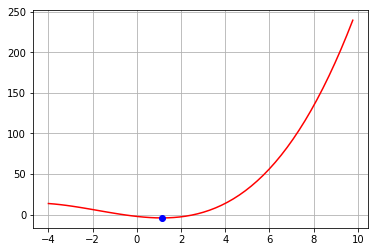

In [76]:
pp.plot(x2,y2,'r')
pp.plot(1.133,fx2(1.133),'bo')
pp.grid(True)
pp.show()